In [1]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [2]:
sopening = []
sclose = []
sx=[]
sa=[]
sb=[]
count=0
original=0

In [3]:
def get_data(filename):
	with open(filename, 'r') as csvfile:
		csvFileReader = csv.reader(csvfile)
		next(csvFileReader)	
		for row in csvFileReader:
			sopening.append(float(row[2]))
			sclose.append(float(row[5]))
	return

In [4]:
get_data('yahoostock.csv') 




In [5]:
def predict_price(sopening,sclose, y):
    sopening = np.reshape(sopening,(len(sopening), 1))
    svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
    sx=[y]
    sx=np.reshape(sx,(len(sx),1))
    svr_rbf.fit(sopening,sclose)
    return svr_rbf.predict(sx)

 



In [6]:
for u in range(100):
    sa.append(predict_price(sopening,sclose,sopening[(99-u)]))


   

In [7]:

for u in range(100):
    sb.append(sclose[99-u])

In [8]:
for i in range(len(sa)):
    if (sa[i]>sb[i]):
        count=((sa[i]-sb[i])/sb[i])
        original=original+count
    if (sa[i]<sb[i]):
        count=((sb[i]-sa[i])/sb[i])
        original=original+count



Accuracy [98.56306691]


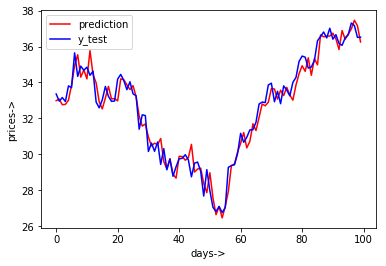

In [9]:
       
t=100-((original/len(sb))*100)
print("Accuracy",t)
import matplotlib.pyplot as plt2

plt2.plot(sa,color='red', label='prediction')
plt2.plot(sb,color='blue', label='y_test')
plt2.xlabel('days->')
plt2.ylabel('prices->')
plt2.legend(loc='upper left')
plt2.show()

# 